# The Lotka-Volterra Model of Predator-Prey Relationships

## Task 1: Theoretical Analysis

#### The Lotka Equations
    In 1920, Lotka observed remarkable dynamical properties in this set of coupled, autocatalytic reactions:


$$
1.~\overline{ F} + X \xrightarrow{c_1} 2X
$$

$$
2.~X + Y \xrightarrow{c_2} 2Y
$$

$$
3.~Y \xrightarrow{c_3} Z
$$
\
These Equations Represent:
1. A prey-food interaction results in prey reproduction 
2. A predator-prey interaction results in prey death and predator reproduction 
3. Predator death over time

\
With Defined Terms: 
- $\overline{ F}$: Food resources (indicated to be a non-limiting resource)
- $X$: # of Prey units
- $Y$: # of Predator units
- $c_n$: Rate of reaction $n$


#### The Lotka-Volterra Equations
    Years later, Volterra independently investigated Lotka's corresponding reaction-rate equations to model a simple predator-prey ecosystem.

$$
4.~\frac{{dX}}{{dt}} = \alpha X - \beta X  Y
$$

$$
5.~\frac{{dY}}{{dt}} = \delta X  Y - \gamma Y
$$
\
These Equations Represent:

4. Instantaneous rate of change in prey # over time
5. Instantaneous rate of change in predator # over time


\
With Defined Terms: 
- $X$: # of Prey units
- $Y$: # of Predator units
- $t$: time
- $α$: Prey reproduction rate constant  ( $α=c_1=$ rate of reaction 1 )
- $β$: Prey death rate constant  ( $β=c_2=$ rate of reaction 2 )
- $δ$: Predator reproduction rate constant  ( $δ=β$ )
- $γ$: Rate constant indicating predator decrease over time  ( $γ=$ rate of reaction 3 )


There are several key biological assumptions revealed when taking a close look at equations 1-5 which detail the nature of: prey reproduction, predator-prey interaction, predator death, and the inter-relatedness of these processes. 

In L-V modeling of prey reproduction (Eq. 1), prey genesis is assumed to only be influenced by: the amount of food $F$, the amount of extant prey $X$, and the prey reproduction-rate constant $c_1 = \alpha$. Food is traditionally assumed to be a non-limiting resource ($F \xrightarrow{ass.} \overline{F}$), so Equation 4's calculated rate of prey birth is: $\alpha X$. Simultaneously, prey death is assumed to be influenced by the product of prey & predator counts $X*Y$, along with the predator-prey interaction rate constant $c_2 = \beta$. Therefore, Equation 4 can be interpreted as the rate of prey birth ($\alpha X$) minus the rate of prey death ($\beta X*Y$). Notably, in the instance of no extant predator population prey death cannot occur, so X will increase exponentially ad infinitum. 

The L-V equations model predator reproduction as directly inverse to prey death ($\beta XY = \gamma XY$); in short, for every prey death there is a predator birth. Moreover, predators are assumed to die only of natural causes, an exponential decay with rate $γ$, so equation 5's subtrahend $\delta Y$ adequately describes the instantaneous rate of predator death. Similar to Equation 4, Equation 5 can be described as the rate of predator birth ($\gamma X*Y$) minus the rate of predator death ($\delta Y).

The Lotka-Volterra model is completely described by Equations 4 & 5, incorporating no extraneous ingress or egress of any unit to/from the system.


## Task 2: Numerical Simulation

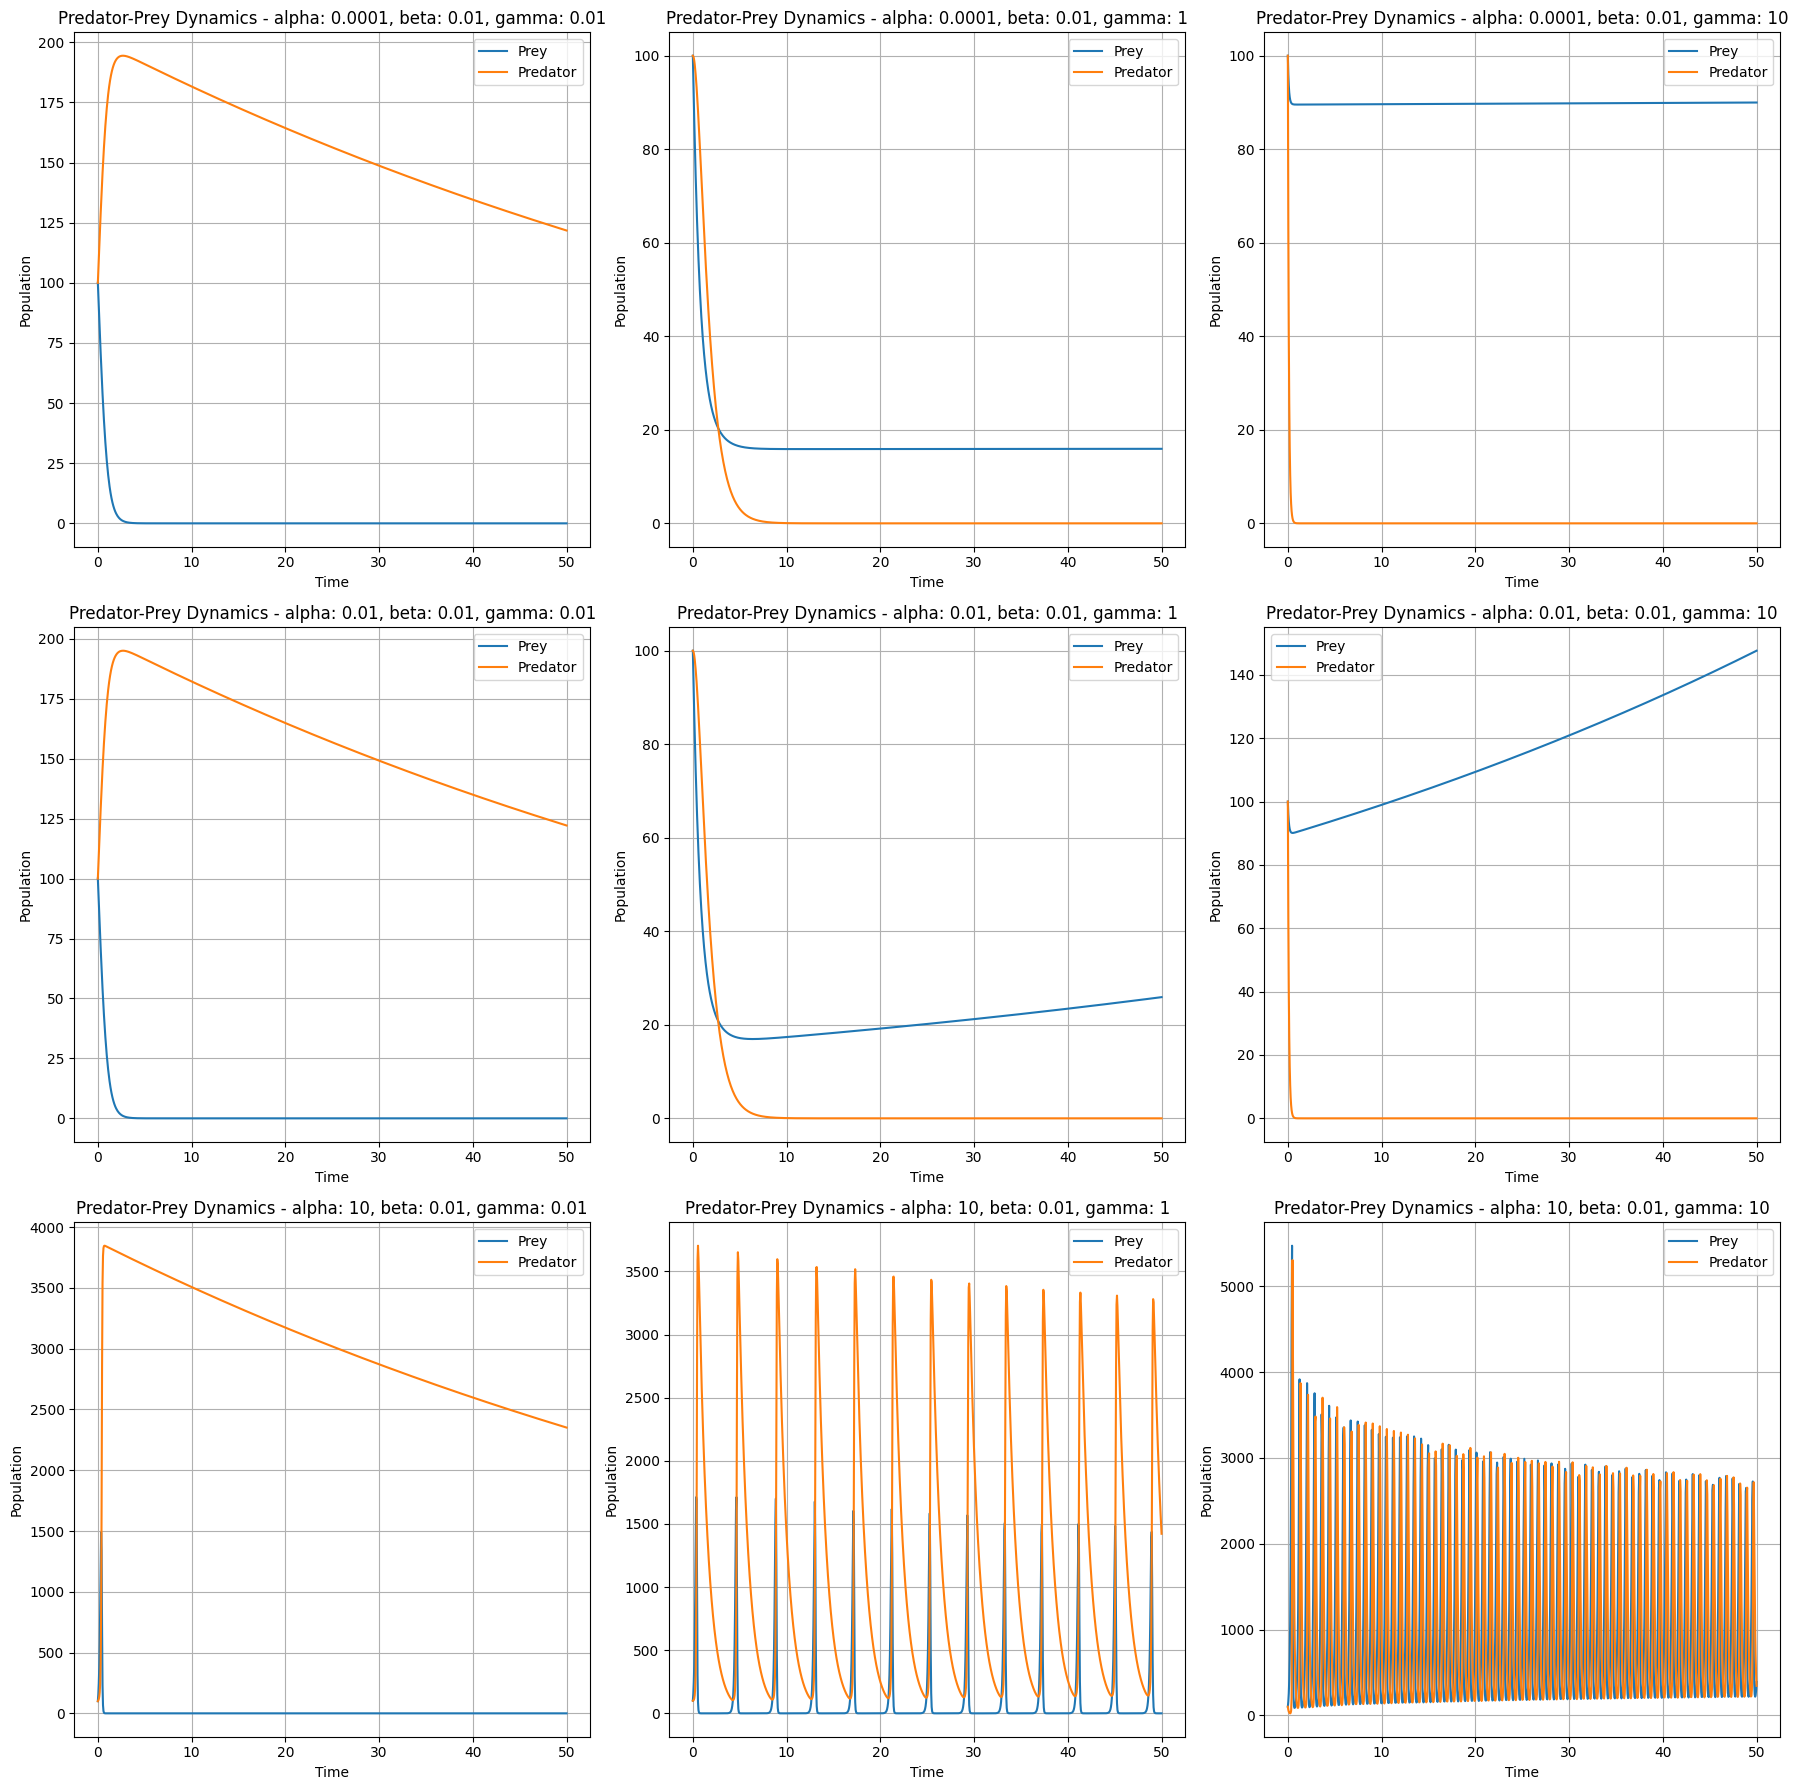

In [38]:
import numpy as np
import matplotlib.pyplot as plt

def lotka_volterra(t, z, alpha, beta, delta, gamma):
    x, y = z
    dxdt = alpha * x - beta * x * y
    dydt = delta * x * y - gamma * y
    return np.array([dxdt, dydt])

def runge_kutta(f, t0, y0, t1, n):
    t = np.linspace(t0, t1, n)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    h = (t1 - t0) / (n - 1)
    for i in range(1, n):
        k1 = h * f(t[i-1], y[i-1])
        k2 = h * f(t[i-1] + 0.5 * h, y[i-1] + 0.5 * k1)
        k3 = h * f(t[i-1] + 0.5 * h, y[i-1] + 0.5 * k2)
        k4 = h * f(t[i-1] + h, y[i-1] + k3)
        y[i] = y[i-1] + (k1 + 2*k2 + 2*k3 + k4) / 6
    return t, y

def simulate_system(alpha, beta, delta, gamma):
    
    # Parameters and Initial Conditions
    y0 = [100, 100]  # initial prey and predator populations
    t0, t1, n = 0, 50, 1000  # start, end, and number of points in time

    t, y = runge_kutta(lambda t, z: lotka_volterra(t, z, alpha, beta, delta, gamma), t0, y0, t1, n)
    return t, y

if __name__ == "__main__":
    alphas = [0.0001, 0.01, 10]  
    betas = [0.01]  
    gammas = [0.01, 1, 10]  
    
    plt.figure(figsize=(18, 18)) 
    plot_number = 1
    
    for alpha in alphas:
        for gamma in gammas:
            t, y = simulate_system(alpha, betas[0], betas[0], gamma)
            
            # 3x3 grid
            plt.subplot(3, 3, plot_number)
            plt.plot(t, y[:, 0], label='Prey')
            plt.plot(t, y[:, 1], label='Predator')
            plt.title(f'Predator-Prey Dynamics - alpha: {alpha}, beta: {betas[0]}, gamma: {gamma}')
            plt.xlabel('Time')
            plt.ylabel('Population')
            plt.grid(True)
            plt.legend()
            plot_number += 1
    
    plt.tight_layout() 
    plt.show()


(Plots are ordered left to right, top to bottom)

#### First Plot (Top Left):

Parameters: α=0.0001, β=0.01, γ=0.01 \
Behavior: The prey population quickly drops to zero due to a very low reproduction rate (α) combined with predation, and after a sharp initial rise the predator population also falls to zero as there are no prey left to sustain them. This results in extinction of both species.
\Result: [0, 0]

#### Second Plot (Top):

Parameters: α=0.0001, β=0.01, γ=1\
Behavior: The predator population quickly drops to zero, and predation levels drop quickly enough that the prey are able to survive extinction and reproduce in perpetuity. \
Result: [inf, 0]

#### Third Plot (Top Right):

Parameters: α=0.0001, β=0.01, γ=10\
Behavior: Predators immediately go extinct and prey gradually increase in perpetuity.\
Result: [inf, 0]

#### Fourth Plot(Left):

Parameters: α=0.01, β=0.01, γ=0.01\
Behavior: Similar to plot 1, prey are quickly killed off and predators gradually go extinct as a result.\
Result: [0, 0]

#### Fifth Plot (Center):

Parameters: α=0.1, β=0.01, γ=1\
Behavior: Similar to plot 2, slighly faster prey reproduction rate.\
Result: [inf, 0]

#### Sixth Plot (Right):

Parameters: α=0.01, β=0.01, γ=1\
Behavior: Similar to plot 3, slightly faster reproduction rate.\
Result: [inf, 0]

#### Seventh Plot (Bottom Left):

Parameters: α=10, β=0.01, γ=10\
Behavior: A sharp climb in predator count wipes out the prey population, and the predator population approaches extinction.\
Result: [0, 0]


#### Eigth Plot (Bottom):

Parameters: α=10, β=0.01, γ=1\
Behavior: Regular oscillations with high frequency, characterized by sustined prey growth, followed by a high-amplitude spike in predator population. This spike in predator count reduces the prey count to nearly zero, thus thinning a necessary resource for predator reproduction and thereby the predator population itself. This fall in predator count permits sustained prey repopulation, starting the cycle anew; this pattern indicates a highly reactive system where populations rapidly fluctuate in response to each other.


#### Ninth Plot (Bottom Right):

Parameters: α=10, β=0.01, γ=10\
Behavior: Extremely rapid oscillations with high frequency, due to equally values of prey reproduction rate and predator mortality rate. This once again results in a highly reactive system where populations rapidly fluctuate in response to each other.

### Analysis:

The simulated system dynamics of the Lotka-Volterra reactions display significant variation depending on the ratio of initial parameter values. When gamma and beta values are equal predator birth quickly outpaces predator death, so after the amount of extant of prey drops to 0 the predator population gradually follows (result of [0, 0]). When gamma is larger than alpha and beta, predators die faster than they reproduce and [prey, predator] populations approaches [inf, 0]. When gamma and alpha are both equal to 10 and greater than beta=0.01, the system experiences rapid oscillations characteristic of a highly reactive system, predator and prey counts exhibiting frequent, high-amplitude patterns.

## Task 3: Phase Plane Analysis

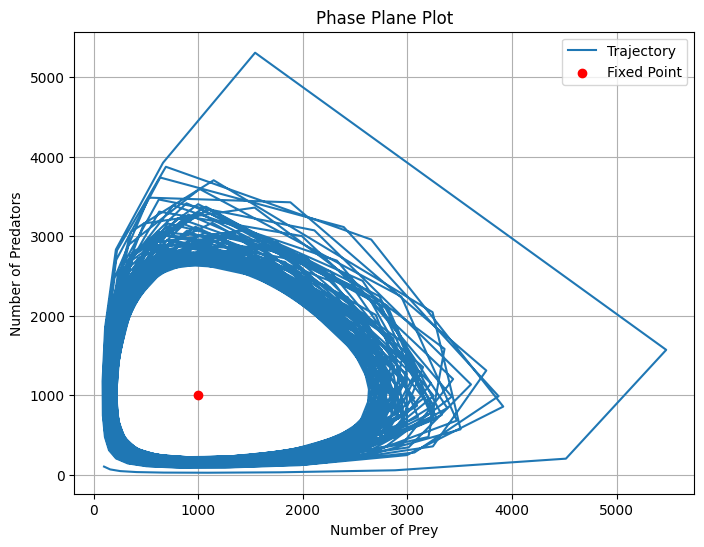

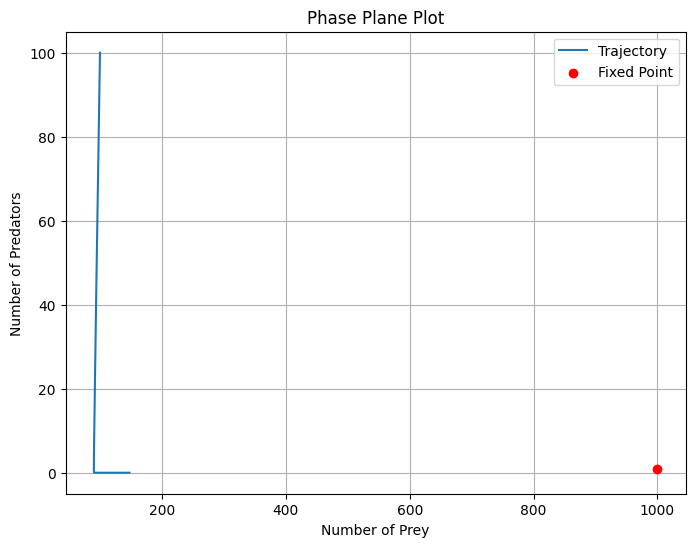

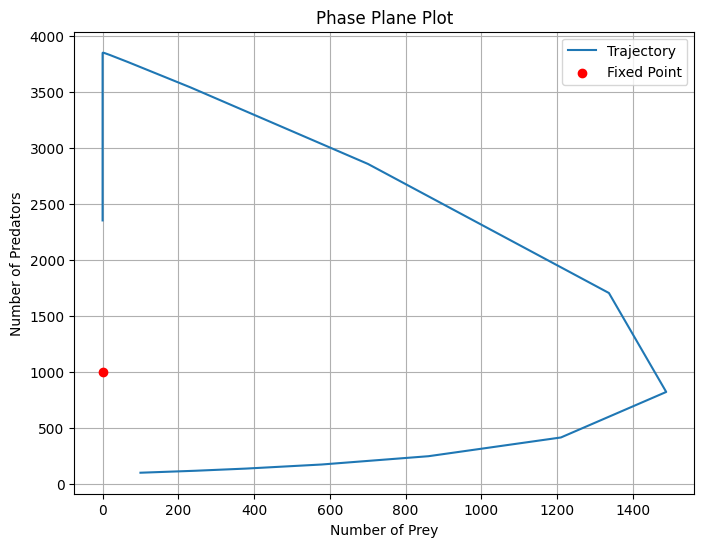

In [41]:
def phase_plane_plot(t, y, alpha, beta, gamma):
    X_star = gamma / beta
    Y_star = alpha / beta
    plt.figure(figsize=(8, 6))
    plt.plot(y[:, 0], y[:, 1], label='Trajectory')
    plt.scatter([X_star], [Y_star], color='red', zorder=5, label='Fixed Point')
    plt.title('Phase Plane Plot')
    plt.xlabel('Number of Prey')
    plt.ylabel('Number of Predators')
    plt.grid(True)
    plt.legend()
    plt.show()

# Use one set of parameters to demonstrate phase plane analysis
alpha, beta, gamma = 10, 0.01, 10
t, y = simulate_system(alpha, beta, beta, gamma)
phase_plane_plot(t, y, alpha, beta, gamma)


# Use one set of parameters to demonstrate phase plane analysis
alpha, beta, gamma = 0.01, 0.01, 10
t, y = simulate_system(alpha, beta, beta, gamma)
phase_plane_plot(t, y, alpha, beta, gamma)

alpha, beta, gamma = 10, 0.01, 0.01
t, y = simulate_system(alpha, beta, beta, gamma)
phase_plane_plot(t, y, alpha, beta, gamma)

(Top) Plot of alpha = 10, beta = 0.01, gamma = 10,
\(Middle) plot of alpha = 0.01, beta = 0.01, gamma = 10, 
\(Bottom) plot of alpha = 10, beta = 0.01, gamma = 0.01. 

- With parameters resulting in continued oscillations (Top), the phase plane plot oscillates about the fixed point (1000, 1000) in a "drunkard's walk". The solution orbit determined by the phase plane analysis (using parameters equal to those used for the ninth Lotka-Volterra plot) demonstrates neutrally stable properties; the orbit is characterized by oscillations around equlibrium values without convergence or divergence. 

- With parameters resulting in [inf, 0] (Center), the predator count fixates at 0, allowing prey to reproduce exponentially.

- With parameters resulting in [0, 0], the number of predators increase until prey is extinct, then the predators gradually approach 0.

### Determining Fixed Points:

For the Lotka-Volterra Equations:

$$
    4.~\frac{{dX}}{{dt}} = \alpha X - \beta X  Y
$$

$$
    5.~\frac{{dY}}{{dt}} = \delta X  Y - \gamma Y
$$
The fixed points of this system can be found by setting equations 4 & 5 equal to zero:

$$ \frac{{dX}}{{dt}} = \frac{{dY}}{{dt}} = 0 $$

For dX/dt:
 $$ 0 = \alpha X - \beta X  Y $$

 $$ \beta X Y = \alpha X $$
 
 $$ Y = \frac{{\alpha}}{{\beta}} = \frac{{c_1}}{{c_2}} $$


For dY/dt:
 $$ 0 = \delta X Y - \gamma Y $$

 $$ \gamma Y = \delta X Y $$
 
 $$ X = \frac{{\gamma}}{{\delta}} = \frac{{c_3}}{{c_2}} $$
 

Therefore, a non-trivial fixed point occurs when X and Y satisfy the conditions: 

$$ X = \frac{{\gamma}}{{\delta}},~Y = \frac{{\alpha}}{{\beta}}$$

- These values represent an equilibrium state where X and Y do not change over time, growth and death rates balancing out exactly.

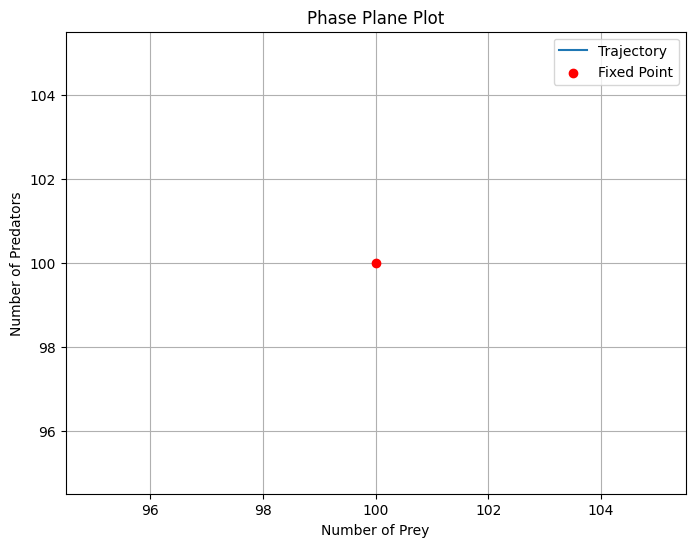

In [42]:
alpha, beta, gamma = 1, 0.01, 1
t, y = simulate_system(alpha, beta, beta, gamma)
phase_plane_plot(t, y, alpha, beta, gamma)

Phase Plane Plot using steady-state parameters: alpha, beta, gamma = 1, 0.01, 1



- Use of the stable-state parameters for the phase plane plot result in a plot with no visible trajectory line, as there is no population change at $\frac{{dX}}{{dt}} = \frac{{dY}}{{dt}} = 0$